## Exercise

In this exercise, the intention is to get a bit more handson experience with the convolution operator

In [1]:
import torch
from pathlib import Path
import requests
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
from scipy import signal

The MNIST database consists of grey scale images of handwritten digits. Each image is of size $28\times 28$; see figure below for an illustration. The data set is divided into a training set, validation set, and test set consisting of $50000$, $10000$, and $10000$ images, respectively; in all data sets the images are labeled with the correct digits. If interested, you can find more information about the MNIST data set at http://yann.lecun.com/exdb/mnist/, including accuracy results for various machine learning methods.

![MNIST DATA](MNIST-dataset.png)

First we download the dataset and unpackage it.

In [25]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

We then extract the data and store it numpy arrays: x_train, y_train, x_valid, y_valid, x_test, y_test 

In [26]:
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), (x_test, y_test)) = pickle.load(f, encoding="latin-1")

Check the shape of the x_valid holding the validation data

The images are stored in rows of length $784$, hence to display the images we need to reshape them to $28\times 28$.

(50000, 784)


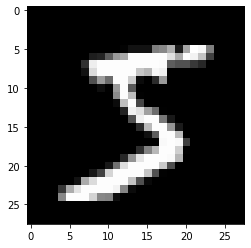

In [32]:
pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

We can also convert the image into black and white

(50000, 784)


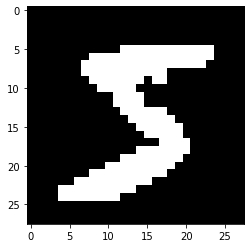

In [41]:
bw = np.array(x_train[0]>0, dtype=int)
pyplot.imshow(bw.reshape((28, 28)), cmap="gray")
print(x_train.shape)

We can do 2D convolutions using the function convolve2d from scipy.signal. Below is an example, where we apply the convolution operator from Slide 29 to the image above.

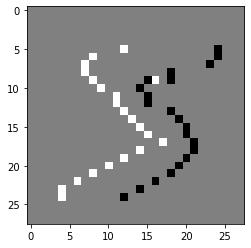

In [42]:
kernel = np.array([[1,-1]])
res = signal.convolve2d(bw.reshape((28, 28)),kernel, 'same')
pyplot.imshow(res.reshape((28, 28)), cmap="gray")

__Exercise:__ 

Experiment with different kernels to get an impression of the convolution operator. You may find some inspiration for kernels [here](https://en.wikipedia.org/wiki/Kernel_(image_processing)). If you feel adventuruous, you are most welcome to play around with other images. 

Try also taking a closer look at the numerical values being produced to verify your understanding.